# Úkol - příprava dat, základní statistická analýza

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

Pro tento příklad budeme používat podmnožinu s tohoto souboru.

!!! Vytvořený subset nemusí statisticky odpovídat původnímu souboru

## Sub dataset
- Data  = struktura s vyplněnými daty
- m      = počet řádků = 100
- x’s    = vstupní proměnná / features
- y’s    = výstupní promměná / target
- (x, y) = jeden řádek z training dataset
- x(2)   = (4, 5, 3374, 85)
- y(2)   = 1 050 000

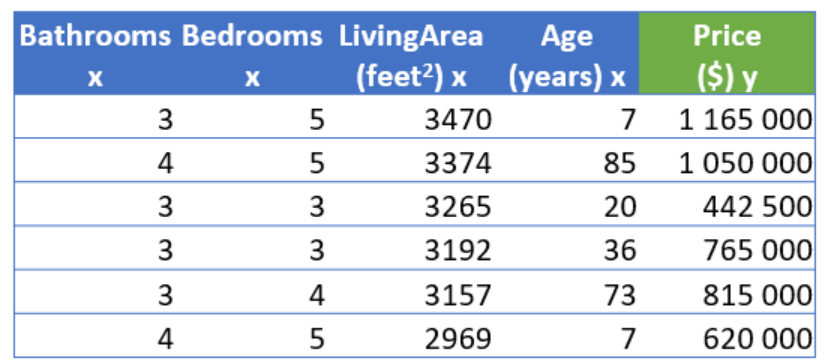

# Úkol

- Proveďte statistickou analýzu dat
- Vizualizujte data
- Vyberte vhodné proměnné pro lineární model
- Standardizujte data

## Čtení dat z CSV souboru

In [1]:
import pandas as pd 

In [3]:
data = pd.read_csv ("..\\dataset\\portland_filtered.csv",  sep=';')

## Základní charakteristiky data
- náhled dat
- zobrazení základních statistik (průměr, minimum, maximum, ...)
- kontrola NaN hodnot

## Distribuce dat
- grafy s distribucí dat
- boxplot grafy
- popsat, jaká jsou data (vychýlené hodnoty, ...)

## Vztahy mezi daty
- pairplot
- korelační tabulka
- Určit, které sloupce jsou lineárně závislé, vhodné pro vysvětlení price

## Standardizace dat

Každá funkce má jinou střední, standardní odchylku.

Standardizační centrum a funkce měřítka.

Důvody:
* zabránit tomu, aby některé funkce modelu dominovaly
* může pomoci rychleji konvergovat modely strojového učení
* může usnadnit interpretaci koeficientů modelu strojového učení

Výpočet:
* x_new = (x – střední hodnota) / směrodatná_odchylka
* průměr = součet (x) / počet (x)
* směrodatná_odchylka = sqrt( součet ( (x – průměr)^2 ) / počet (x))

- proveďte standardizaci sloupců použitelných pro linární regresi
- zobrazte rozložení původních a standardizovaných dat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes
None
       YearsExperience       Salary
count        30.000000    30.000000
mean          5.313333  5070.933333
std           2.837888  2070.992764
min           1.100000  1857.000000
25%           3.200000  3386.000000
50%           4.700000  4828.000000
75%           7.700000  6933.000000
max          10.500000  8266.000000


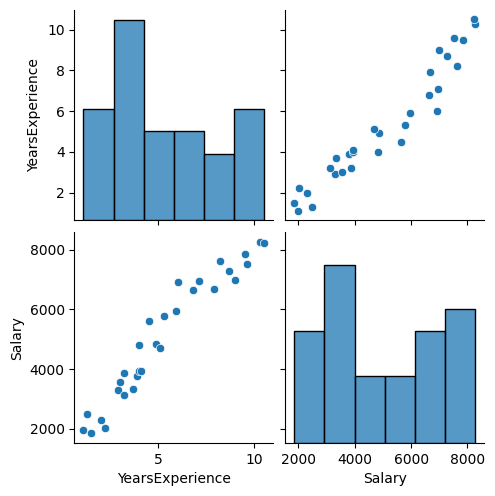

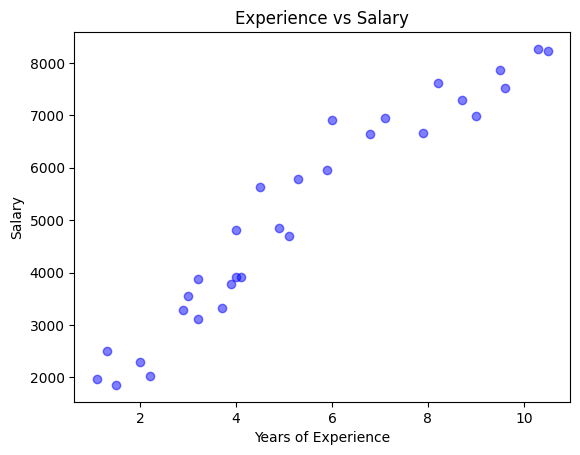

                 YearsExperience    Salary
YearsExperience         1.000000  0.964369
Salary                  0.964369  1.000000
Koeficient: 1963.6318204921213
Intercept: 5070.933333333333


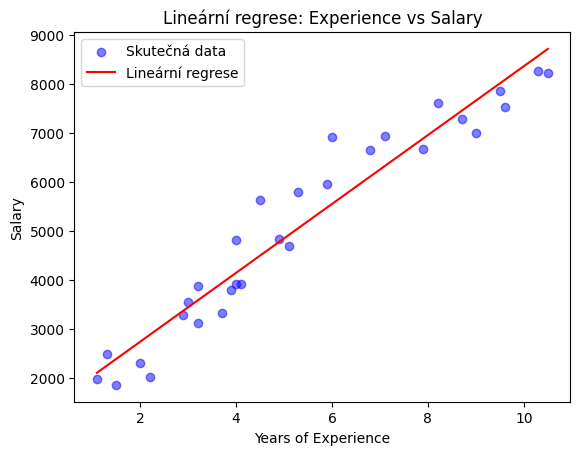

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 1. Načtení datasetu
df = pd.read_csv("..\\dataset\\salary_dataset.csv")

# 2. Statistická analýza
print(df.info())  # Základní informace o datech
print(df.describe())  # Statistické údaje

# 3. Vizualizace dat
sns.pairplot(df)
plt.show()

# Scatter plot pro závislost mezi zkušenostmi a platem
plt.scatter(df["YearsExperience"], df["Salary"], color='blue', alpha=0.5)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()

# 4. Korelace mezi proměnnými
print(df.corr())

# 5. Výběr vhodných proměnných pro lineární model
X = df[["YearsExperience"]]  # Vysvětlující proměnná
y = df["Salary"]  # Cílová proměnná

# 6. Standardizace dat
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Lineární regresní model
model = LinearRegression()
model.fit(X_scaled, y)

# Výpis koeficientů
print(f"Koeficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predikce pro vizualizaci
y_pred = model.predict(X_scaled)

# 8. Vizualizace modelu
plt.scatter(X, y, color='blue', alpha=0.5, label="Skutečná data")
plt.plot(X, y_pred, color='red', label="Lineární regrese")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Lineární regrese: Experience vs Salary")
plt.legend()
plt.show()
